# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the titanic train.csv file into a dataframe
ttnic_train = pd.read_csv('train.csv')
ttnic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# show the percentage of the passengers that boarded at different ports
ports_group = ttnic_train.Embarked.value_counts(normalize=True)

for i in range(len(ports_group)):
    ports_name = ''

    if ports_group.index[i] == 'C':
        ports_name = 'Cherbourg'
    elif ports_group.index[i] == 'S':
        ports_name = 'Southampton'
    elif ports_group.index[i] == 'Q':
        ports_name = 'Queenstown'

    print(f'Passengers boared at {ports_name} ports take {ports_group[i]:.2%} percentage.')
        

Passengers boared at Southampton ports take 72.44% percentage.
Passengers boared at Cherbourg ports take 18.90% percentage.
Passengers boared at Queenstown ports take 8.66% percentage.


<AxesSubplot:>

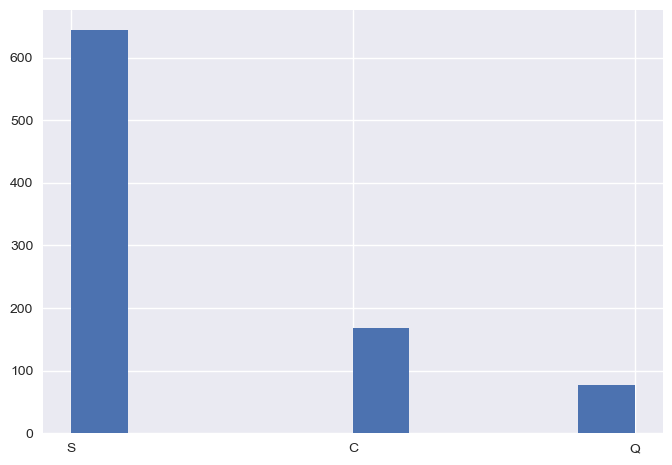

In [19]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column

plt.style.use('seaborn')

ttnic_train.Embarked.hist()

![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [36]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.

for sex_name, sex_df in ttnic_train.groupby('Sex'):

    percent = sex_df.Survived.value_counts(normalize=True)[1]
    print(f'Survival rate of {sex_name} is {percent:.2%}')


Survival rate of female is 74.20%
Survival rate of male is 18.89%


<AxesSubplot:>

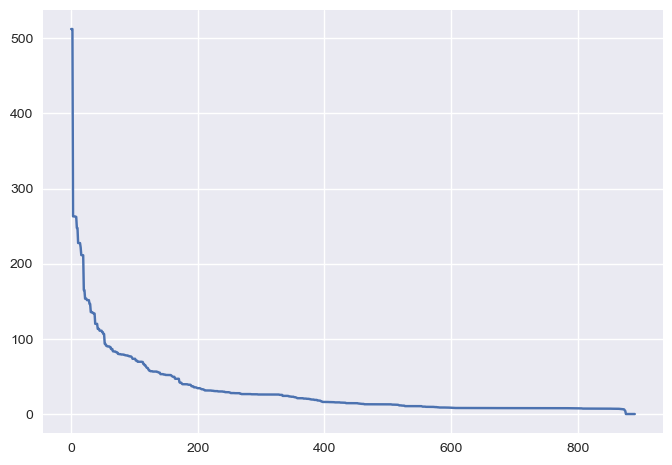

In [42]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below

ttnic_train.Fare.sort_values(ascending=False, ignore_index=True).plot()



![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



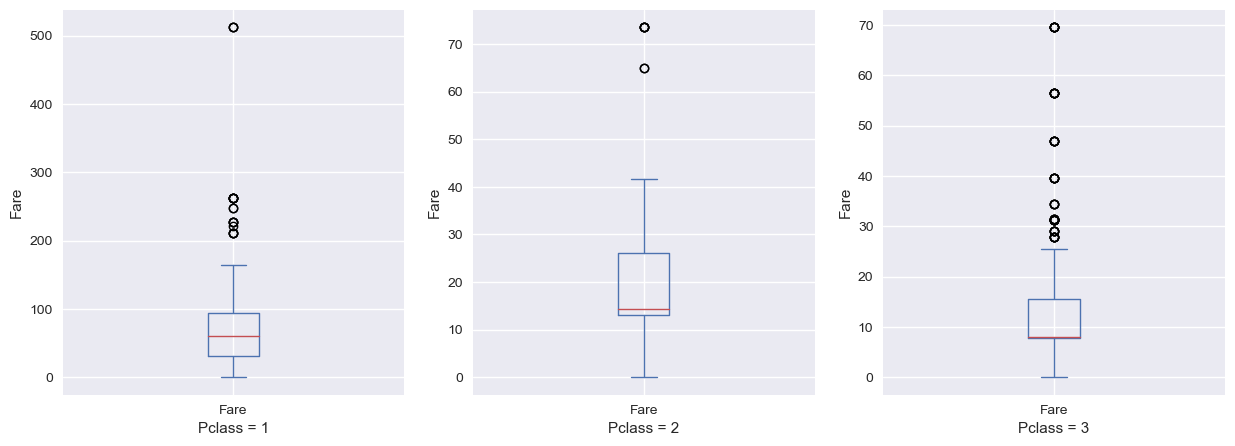

In [49]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below

fig, ax = plt.subplots(1, 3, figsize=(15,5))

i = 0

for class_name, class_df in ttnic_train.groupby('Pclass'):

    class_df.Fare.plot.box(ax=ax[i])
    ax[i].set_xlabel(f'Pclass = {class_name}')
    ax[i].set_ylabel('Fare')

    i += 1


![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [75]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function

sur_rate = {}

for pclass, pclass_df in ttnic_train.groupby('Pclass'):

    prate = pclass_df.Survived.value_counts(normalize=True)[1]
    sur_rate[pclass] = prate

values = list(sur_rate.values())
keys = list(sur_rate.keys())

for i in range(len(sur_rate)):

    if values[i] == max(values):
        print(f'for people with ticket class {keys[i]}, the survival rate is the highest, which is {values[i]:.2%}')

for people with ticket class 1, the survival rate is the highest, which is 62.96%


<AxesSubplot:xlabel='Pclass,Survived'>

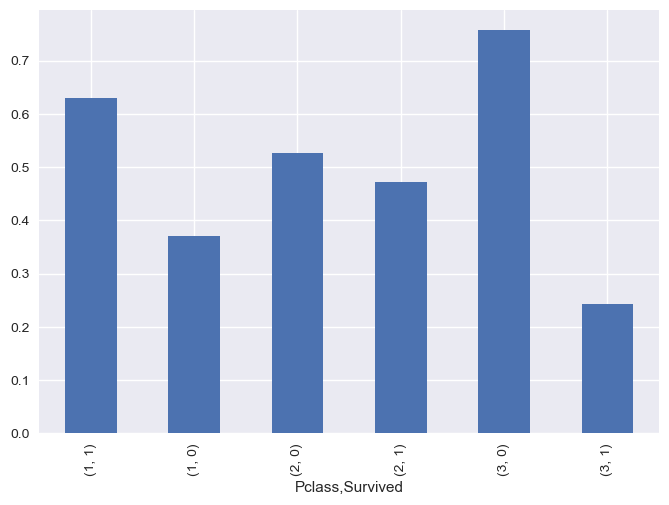

In [79]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below

ttnic_train[['Pclass', 'Survived']].groupby('Pclass').value_counts(normalize=True).plot.bar()

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
